In [2]:
!pip install tqdm

     ---------------------------------------- 78.4/78.4 kB 2.1 MB/s eta 0:00:00


In [4]:
from tqdm import tqdm
import time

In [6]:
for i in tqdm(range(100),'진행상황'):
    time.sleep(0.1)

진행상황: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.21it/s]


In [7]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [8]:
url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=20220801'
html = requests.get(url)
html

<Response [200]>

In [9]:
soup = bs(html.text, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<!-- bgsweb-www903 -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드,놀면뭐하니,유플래쉬,유플래시" name="keywords">
<script type="text/javascript">
	if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.bugsm.co.kr/nbugs"; 
	//var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlJs = "/js";
	var g_urlMe = "http

In [19]:
tr_tags = soup.select('div#CHARTday tbody tr')

In [36]:
date = soup.select_one('fieldset.filterChart time')['datetime'][:10].replace('.','-')
rank = tr_tags[0].select_one('div.ranking strong').text
title = tr_tags[0].select_one('p.title a').text
artist = tr_tags[0].select_one('p.artist a').text
album = tr_tags[0].select_one('a.album').text

print(date, rank, title, artist, album)

2022-08-01 1 Attention NewJeans NewJeans 1st EP 'New Jeans'


In [37]:
print(len(tr_tags))

100


In [42]:
ls_daily = []
for tr_tag in tr_tags:
    date = soup.select_one('fieldset.filterChart time')['datetime'][:10].replace('.','-')
    rank = int(tr_tag.select_one('div.ranking strong').text)
    title = tr_tag.select_one('p.title a').text
    artist = tr_tag.select_one('p.artist a').text
    album = tr_tag.select_one('a.album').text
    
    dict = {
        '날짜': date,
        '순위': rank,
        '곡명': title,
        '아티스트': artist,
        '앨범': album
    }
    
    ls_daily.append(dict)

df_daily = pd.DataFrame(ls_daily)
df_daily

,날짜,순위,곡명,아티스트,앨범
0,2022-08-01,1,Attention,NewJeans,NewJeans 1st EP 'New Jeans'
1,2022-08-01,2,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans'
2,2022-08-01,3,그때 그 순간 그대로 (그그그),WSG워너비 (가야G),WSG워너비 1집
3,2022-08-01,4,SNEAKERS,ITZY (있지),CHECKMATE
4,2022-08-01,5,보고싶었어,WSG워너비 (4FIRE),WSG워너비 1집
...,...,...,...,...,...
95,2022-08-01,96,내 기쁨은 너가 벤틀리를 끄는 거야,김승민,PROTOTYPE RESEARCH #0063
96,2022-08-01,97,나빌레라,현아,나빌레라
97,2022-08-01,98,Copycat,Apink 초봄 (에이핑크 초봄),Copycat
98,2022-08-01,99,Guerrilla,ATEEZ(에이티즈),THE WORLD EP.1 : MOVEMENT


In [65]:
#df_daily['순위'].values
#print(type(df_daily['순위'].values))
#df_daily['순위'].values
tmp = []
for i in range(100,0,-1):
    tmp.append(i)
#tmp

In [66]:
df_daily['점수'] = tmp
df_daily

,날짜,순위,곡명,아티스트,앨범,점수
0,2022-08-01,1,Attention,NewJeans,NewJeans 1st EP 'New Jeans',100
1,2022-08-01,2,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans',99
2,2022-08-01,3,그때 그 순간 그대로 (그그그),WSG워너비 (가야G),WSG워너비 1집,98
3,2022-08-01,4,SNEAKERS,ITZY (있지),CHECKMATE,97
4,2022-08-01,5,보고싶었어,WSG워너비 (4FIRE),WSG워너비 1집,96
...,...,...,...,...,...,...
95,2022-08-01,96,내 기쁨은 너가 벤틀리를 끄는 거야,김승민,PROTOTYPE RESEARCH #0063,5
96,2022-08-01,97,나빌레라,현아,나빌레라,4
97,2022-08-01,98,Copycat,Apink 초봄 (에이핑크 초봄),Copycat,3
98,2022-08-01,99,Guerrilla,ATEEZ(에이티즈),THE WORLD EP.1 : MOVEMENT,2


In [69]:
dates = pd.date_range('2022-02-01','2022-03-23')
dates

DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23'],
              dtype='datetime64[ns]', freq='D')

In [73]:
df_dates = []
for date in dates:
    url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate='+str(date)

    html = requests.get(url)
    soup = bs(html.text, 'html.parser')
    tr_tags = soup.select('div#CHARTday tbody tr')

    ls_daily = []
    for tr_tag in tr_tags:
        date = soup.select_one('fieldset.filterChart time')['datetime'][:10].replace('.','-')
        rank = int(tr_tag.select_one('div.ranking strong').text)
        title = tr_tag.select_one('p.title a').text
        artist = tr_tag.select_one('p.artist a').text
        album = tr_tag.select_one('a.album').text

        dict = {
            '날짜': date,
            '순위': rank,
            '곡명': title,
            '아티스트': artist,
            '앨범': album
        }

        ls_daily.append(dict)

    print('date:', date, 'len:', len(dict))
    df_daily = pd.DataFrame(ls_daily)
    tmp = []
    for i in range(len(df_daily),0,-1):
        tmp.append(100 - 1 + df_daily['순위'])
    df_daily['점수'] = tmp
    df_dates.append(df_daily)

df_res = pd.concat(df_dates, ignore_index=True)
display(df_res)

date: 2022-02-01 len: 5
date: 2022-02-02 len: 5
date: 2022-02-03 len: 5
date: 2022-02-04 len: 5
date: 2022-02-05 len: 5
date: 2022-02-06 len: 5
date: 2022-02-07 len: 5
date: 2022-02-08 len: 5
date: 2022-02-09 len: 5
date: 2022-02-10 len: 5
date: 2022-02-11 len: 5
date: 2022-02-12 len: 5
date: 2022-02-13 len: 5
date: 2022-02-14 len: 5
date: 2022-02-15 len: 5
date: 2022-02-16 len: 5
date: 2022-02-17 len: 5
date: 2022-02-18 len: 5
date: 2022-02-19 len: 5
date: 2022-02-20 len: 5
date: 2022-02-21 len: 5
date: 2022-02-22 len: 5
date: 2022-02-23 len: 5
date: 2022-02-24 len: 5
date: 2022-02-25 len: 5
date: 2022-02-26 len: 5
date: 2022-02-27 len: 5
date: 2022-02-28 len: 5
date: 2022-03-01 len: 5
date: 2022-03-02 len: 5
date: 2022-03-03 len: 5
date: 2022-03-04 len: 5
date: 2022-03-05 len: 5
date: 2022-03-06 len: 5
date: 2022-03-07 len: 5
date: 2022-03-08 len: 5
date: 2022-03-09 len: 5
date: 2022-03-10 len: 5
date: 2022-03-11 len: 5


ValueError: Length of values (100) does not match length of index (99)

In [74]:
url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=2022-03-11'

html = requests.get(url)
soup = bs(html.text, 'html.parser')
tr_tags = soup.select('div#CHARTday tbody tr')

ls_daily = []
for tr_tag in tr_tags:
    date = soup.select_one('fieldset.filterChart time')['datetime'][:10].replace('.','-')
    rank = int(tr_tag.select_one('div.ranking strong').text)
    title = tr_tag.select_one('p.title a').text
    artist = tr_tag.select_one('p.artist a').text
    album = tr_tag.select_one('a.album').text
    
    dict = {
        '날짜': date,
        '순위': rank,
        '곡명': title,
        '아티스트': artist,
        '앨범': album
    }
    
    ls_daily.append(dict)

df_daily = pd.DataFrame(ls_daily)
df_daily

,날짜,순위,곡명,아티스트,앨범
0,2022-03-11,1,GANADARA (Feat. 아이유),박재범,GANADARA
1,2022-03-11,2,INVU,태연 (TAEYEON),INVU - The 3rd Album
2,2022-03-11,3,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙)
3,2022-03-11,4,꽃 (With 김민석 of 멜로망스),박봄 (Park Bom),꽃
4,2022-03-11,5,듣고 싶을까,MSG워너비(M.O.M),듣고 싶을까
...,...,...,...,...,...
94,2022-03-11,96,Dun Dun Dance,오마이걸(OH MY GIRL),Dear OHMYGIRL
95,2022-03-11,97,다라리 (DARARI),TREASURE(트레저),THE SECOND STEP : CHAPTER ONE
96,2022-03-11,98,Promise You,규현 (KYUHYUN),기상청 사람들 : 사내연애 잔혹사 편 OST Part.3
97,2022-03-11,99,Shivers,Ed Sheeran(에드 시런),=


In [75]:
type(df_daily['순위'][0])

numpy.int64

In [76]:
if df_daily['순위'][0] == 1:
    print('yes')

yes


In [77]:
for idx,v in enumerate(df_daily['순위']):
    if((idx+1) != v):
        print(v)
        break

89


In [79]:
df_daily[80:]

,날짜,순위,곡명,아티스트,앨범
80,2022-03-11,81,OHAYO MY NIGHT,디핵(D-Hack),OHAYO MY NIGHT
81,2022-03-11,82,"스물다섯, 스물하나",자우림(Jaurim),"Goodbye, grief."
82,2022-03-11,83,Go!,도겸 (SEVENTEEN),스물다섯 스물하나 OST Part 5
83,2022-03-11,84,Polaroid Love,ENHYPEN,DIMENSION : ANSWER
84,2022-03-11,85,이젠 친구에서 연인이 되고 싶어,먼데이 키즈(Monday Kiz),이젠 친구에서 연인이 되고 싶어 (먼데이 키즈 X soundtrack#1)
85,2022-03-11,86,"어떻게 이별까지 사랑하겠어, 널 사랑하는 거지",AKMU(악뮤),항해
86,2022-03-11,87,너무 아픈 사랑은 사랑이 아니었음을,김기태,싱어게인2 - 무명가수전 Episode.5
87,2022-03-11,89,헤픈 우연,헤이즈(Heize),HAPPEN
88,2022-03-11,90,"Peaches (feat. Daniel Caesar, Giveon)",Justin Bieber(저스틴 비버),Justice
89,2022-03-11,91,이별후회,김나영,그 해 우리는 OST Part.4


In [80]:
len(df_daily)

99

In [ ]:
1위 100점
100 - 1 + ?위

In [86]:
df_dates = []
for date in tqdm(dates, '진행상황'):
    url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate='+str(date)

    html = requests.get(url)
    soup = bs(html.text, 'html.parser')
    tr_tags = soup.select('div#CHARTday tbody tr')

    ls_daily = []
    for tr_tag in tr_tags:
        date = soup.select_one('fieldset.filterChart time')['datetime'][:10].replace('.','-')
        rank = int(tr_tag.select_one('div.ranking strong').text)
        title = tr_tag.select_one('p.title a').text
        artist = tr_tag.select_one('p.artist a').text
        album = tr_tag.select_one('a.album').text

        dict = {
            '날짜': date,
            '순위': rank,
            '곡명': title,
            '아티스트': artist,
            '앨범': album
        }

        ls_daily.append(dict)

    # print('date:', date, 'len:', len(dict))
    df_daily = pd.DataFrame(ls_daily)
    tmp = []
    for i in range(len(df_daily),0,-1):
        tmp.append(100 - df_daily['순위'][len(df_daily)-i] +1)
    df_daily['점수'] = tmp
    df_dates.append(df_daily)

df_res = pd.concat(df_dates, ignore_index=True)
display(df_res)

진행상황: 100%|████████████████████████████████████████████████████████████████████████| 51/51 [00:38<00:00,  1.32it/s]


,날짜,순위,곡명,아티스트,앨범,점수
0,2022-02-01,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
1,2022-02-01,2,ELEVEN,IVE (아이브),ELEVEN,99
2,2022-02-01,3,Can't Control Myself,태연 (TAEYEON),Can't Control Myself,98
3,2022-02-01,4,Step Back,GOT the beat,Step Back,97
4,2022-02-01,5,Dreams Come True,aespa,Dreams Come True - SM STATION,96
...,...,...,...,...,...,...
5094,2022-03-23,96,Diamonds (feat. 태용 of NCT),SURAN (수란),FLYIN' PART1,5
5095,2022-03-23,97,WA DA DA,Kep1er (케플러),FIRST IMPACT,4
5096,2022-03-23,98,Stardust love song,지효 (TWICE),스물다섯 스물하나 OST Part 6,3
5097,2022-03-23,99,소주 한 잔,양다일,소주 한 잔,2


In [114]:
print(type(dates[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# 내가 따로 집계 내본거

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [92]:
# 어떤 가수가 종합 점수가 가장 높을까
output1 = df_res.groupby('아티스트')['점수'].sum().sort_values(ascending=False)
output1

아티스트
태연 (TAEYEON)     21799
아이유(IU)          16738
aespa            10418
TREASURE(트레저)     8585
BE'O (비오)         8254
                 ...  
Lauv(라우브)            3
임형주                  3
이찬원                  2
최현준 (V.O.S)          1
Sondia               1
Name: 점수, Length: 185, dtype: int64

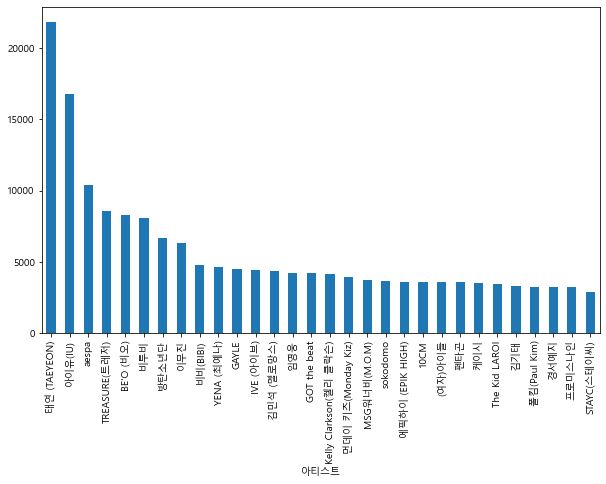

In [96]:
plt.figure(figsize=(10,6))
output1[:30].plot(kind='bar')
plt.show()

In [102]:
# 1위를 많이 해본 가수는 누굴까
output2 = df_res[df_res['순위'] == 1].groupby('아티스트').sum()['순위']
output2 = output2.sort_values(ascending=False)
output2

아티스트
태연 (TAEYEON)              9
(여자)아이들                   8
MSG워너비(M.O.M)             6
비투비                       5
선예                        4
박재범                       3
Kelly Clarkson(켈리 클락슨)    2
Red Velvet (레드벨벳)         2
YENA (최예나)                2
멜로망스(MeloMance)           2
케이시                       2
폴킴(Paul Kim)              2
TREASURE(트레저)             1
노을                        1
먼데이 키즈(Monday Kiz)        1
정국                        1
Name: 순위, dtype: int64

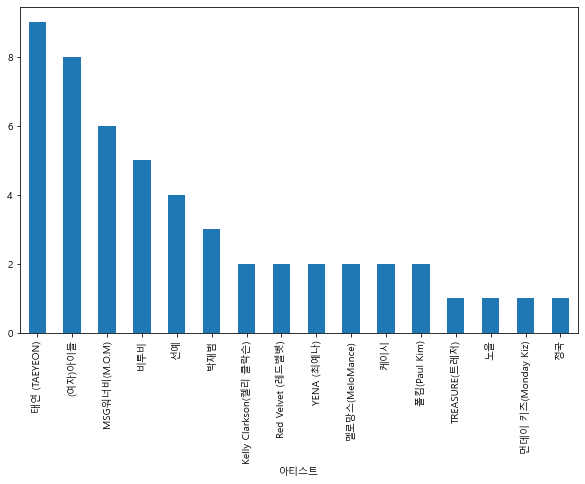

In [103]:
plt.figure(figsize=(10,6))
output2.plot(kind='bar')
plt.show()

In [117]:
# 연속으로 1위를 차지한 가수의 노래는 뭘까
output3 = df_res[df_res['순위'] == 1].groupby('곡명').sum()['순위']
output3 = output2.sort_values(ascending=False)
output3

곡명
INVU                                9
TOMBOY                              8
듣고 싶을까                              6
노래 (The Song)                       5
대낮에 한 이별                            4
GANADARA (Feat. 아이유)                3
Feel My Rhythm                      2
SMILEY (Feat. BIBI)                 2
Stronger (What Doesn't Kill You)    2
사랑인가 봐                              2
어제처럼                                2
언제나 사랑해                             2
Stay Alive (Prod. SUGA of BTS)      1
너 아니면 안돼                            1
잊을 수 있을까                            1
직진 (JIKJIN)                         1
Name: 순위, dtype: int64

In [118]:
output3.index

Index(['INVU', 'TOMBOY', '듣고 싶을까', '노래 (The Song)', '대낮에 한 이별',
       'GANADARA (Feat. 아이유)', 'Feel My Rhythm', 'SMILEY (Feat. BIBI)',
       'Stronger (What Doesn't Kill You)', '사랑인가 봐', '어제처럼', '언제나 사랑해',
       'Stay Alive (Prod. SUGA of BTS)', '너 아니면 안돼', '잊을 수 있을까',
       '직진 (JIKJIN)'],
      dtype='object', name='곡명')

In [126]:
tmp = []
for song in output3.index:
    tmp.append(df_res[(df_res['곡명'] == song) & (df_res['순위'] == 1)])
tmp

[              날짜  순위    곡명          아티스트                    앨범   점수
 1300  2022-02-14   1  INVU  태연 (TAEYEON)  INVU - The 3rd Album  100
 1400  2022-02-15   1  INVU  태연 (TAEYEON)  INVU - The 3rd Album  100
 1600  2022-02-17   1  INVU  태연 (TAEYEON)  INVU - The 3rd Album  100
 1700  2022-02-18   1  INVU  태연 (TAEYEON)  INVU - The 3rd Album  100
 1800  2022-02-19   1  INVU  태연 (TAEYEON)  INVU - The 3rd Album  100
 1900  2022-02-20   1  INVU  태연 (TAEYEON)  INVU - The 3rd Album  100
 2400  2022-02-25   1  INVU  태연 (TAEYEON)  INVU - The 3rd Album  100
 2500  2022-02-26   1  INVU  태연 (TAEYEON)  INVU - The 3rd Album  100
 3500  2022-03-08   1  INVU  태연 (TAEYEON)  INVU - The 3rd Album  100,
               날짜  순위      곡명     아티스트           앨범   점수
 4099  2022-03-14   1  TOMBOY  (여자)아이들  I NEVER DIE  100
 4199  2022-03-15   1  TOMBOY  (여자)아이들  I NEVER DIE  100
 4299  2022-03-16   1  TOMBOY  (여자)아이들  I NEVER DIE  100
 4399  2022-03-17   1  TOMBOY  (여자)아이들  I NEVER DIE  100
 4499  2022-03-18   1  T

In [127]:
pd.concat(tmp)

,날짜,순위,곡명,아티스트,앨범,점수
1300,2022-02-14,1,INVU,태연 (TAEYEON),INVU - The 3rd Album,100
1400,2022-02-15,1,INVU,태연 (TAEYEON),INVU - The 3rd Album,100
1600,2022-02-17,1,INVU,태연 (TAEYEON),INVU - The 3rd Album,100
1700,2022-02-18,1,INVU,태연 (TAEYEON),INVU - The 3rd Album,100
1800,2022-02-19,1,INVU,태연 (TAEYEON),INVU - The 3rd Album,100
1900,2022-02-20,1,INVU,태연 (TAEYEON),INVU - The 3rd Album,100
2400,2022-02-25,1,INVU,태연 (TAEYEON),INVU - The 3rd Album,100
2500,2022-02-26,1,INVU,태연 (TAEYEON),INVU - The 3rd Album,100
3500,2022-03-08,1,INVU,태연 (TAEYEON),INVU - The 3rd Album,100
4099,2022-03-14,1,TOMBOY,(여자)아이들,I NEVER DIE,100


# 형근님 코드 봐드린거

In [87]:
soup.find('a', 'album')

<a class="album hyrend" href="https://music.bugs.co.kr/chart/album/day/total">앨범</a>

In [89]:
tr_tags = soup.select('div#CHARTday tbody tr')

for tr_tag in tr_tags:
    print(tr_tag.find('a', 'album').text)

I NEVER DIE
‘The ReVe Festival 2022 - Feel My Rhythm’
GANADARA
사랑인가 봐 (사내맞선 OST 스페셜 트랙)
INVU - The 3rd Album
The Best Album ‘Needle & Bubble'
YOUNG-LUV.COM
듣고 싶을까
7년을 하루만에 다 끝낼수 있구나
abcdefu
스물다섯 스물하나 OST Part 4
스물다섯 스물하나 OST Part 1
DAYDREAM
벚꽃이 피면 우리 그만 헤어져
I NEVER DIE
ˣ‿ˣ (SMiLEY)
우린 어떠한 별보다 빛날 거야 (이하이 X soundtrack#1)
어제처럼
‘The ReVe Festival 2022 - Feel My Rhythm’
Tea time
취중고백
신사와 아가씨 OST Part.2
Stronger (What Doesn't Kill You)
AD MARE
조각집
‘The ReVe Festival 2022 - Feel My Rhythm’
ELEVEN
I NEVER DIE
Step Back
신호등
Next Level
strawberry moon
Trip:Tape #01
스물다섯 스물하나 OST Part 3
‘The ReVe Festival 2022 - Feel My Rhythm’
스물다섯 스물하나 OST Part 7
STAY
‘The ReVe Festival 2022 - Feel My Rhythm’
THANK YOU
다정히 내 이름을 부르면 (경서예지 x 전건호)
꽃
애쓰지 마요 (2022)
Dreams Come True - SM STATION
Goodbye, grief.
쇼미더머니 10 Episode 2
연대기
조영수 리메이크 프로젝트 Part.2
Can't Control Myself
Weekend
Midnight Guest
그 해 우리는 OST Part.2
Light Switch
그 해 우리는 OST Part.1
Dynamite (DayTime Version)
‘The ReVe Festival 2022 - Feel My Rhythm’


In [112]:
res = []

for i in range(1,100):
    ranking = soup.find('div', 'ranking').find('strong').text
    title = soup.find('p','title').find('a').text
    artist = soup.find('p','artist').text
    album = tr_tags[0].find('a', 'album').text
    tmp={
        '순위':ranking,
        '제목':title,
        '가수':artist,
        '앨범':album
    }
    res.append(tmp)
df = pd.DataFrame(res)
display(df)

TOMBOY


In [ ]:
res = []

for tr_tag in tr_tags:
    ranking = tr_tag.find('div', 'ranking').find('strong').text
    title = tr_tag.find('p','title').find('a').text
    artist = tr_tag.find('p','artist').text
    album = tr_tag.find('a', 'album').text
    tmp={
        '순위':ranking,
        '제목':title,
        '가수':artist,
        '앨범':album
    }
    res.append(tmp)
df = pd.DataFrame(res)
display(df)

In [ ]:
print(soup.find('p','title'))
print(soup.find('p','title').find('a'))
print(soup.find('p','title').find('a').text)